## Day 24 Lecture 1 Assignment

In this assignment, we will build our first logistic regression model on numeric data. We will use the FIFA soccer ratings dataset loaded below and analyze the model generated for this dataset.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ssl
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

ssl._create_default_https_context = ssl._create_unverified_context

<IPython.core.display.Javascript object>

In [3]:
def remove_correlated_features(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (
                corr_matrix.columns[j] not in col_corr
            ):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f"Deleted {colname} from dataset.")
                    del dataset[colname]

    return dataset

<IPython.core.display.Javascript object>

In [12]:
soccer_data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv"
)

<IPython.core.display.Javascript object>

In [13]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,80,54,41,87,89,86,91,34,27,22


<IPython.core.display.Javascript object>

Our response for our logistic regression model is going to be a binary label, "Elite" or "Not Elite", corresponding to whether or not the player has an overall rating greater than or equal to 75. This corresponds to the top 10% or so of soccer players in the data set. Create the response column.

In [14]:
soccer_data["Eliteness"] = (soccer_data["Overall"] >= 75).astype(int)

<IPython.core.display.Javascript object>

In [15]:
soccer_data

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Eliteness
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,48,22,94,94,75,96,33,28,26,1
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,63,29,95,82,85,95,28,31,23,1
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,56,36,89,87,81,94,27,24,33,1
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,76,61,87,94,79,88,68,58,51,1
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,54,41,87,89,86,91,34,27,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,238813,J. Lundstram,47,34,38,40,49,25,42,30,...,46,46,39,52,43,45,40,48,47,0
16118,243165,N. Christoffersson,47,23,52,52,43,36,39,32,...,47,16,46,33,43,42,22,15,19,0
16119,241638,B. Worman,47,25,40,46,38,38,45,38,...,32,15,48,43,55,41,32,13,11,0
16120,246268,D. Walker-Rice,47,44,50,39,42,40,51,34,...,33,22,44,47,50,46,20,25,27,0


<IPython.core.display.Javascript object>

Address potential collinearity issues by removing the appropriate features. There is no universally agreed upon technique for doing so, so feel free to use any reasonable method. We have provided the convenience function *remove_correlated_features* at the top as one way of doing so, and we use a threshold of 0.9 for that function to reduce correlation among features.

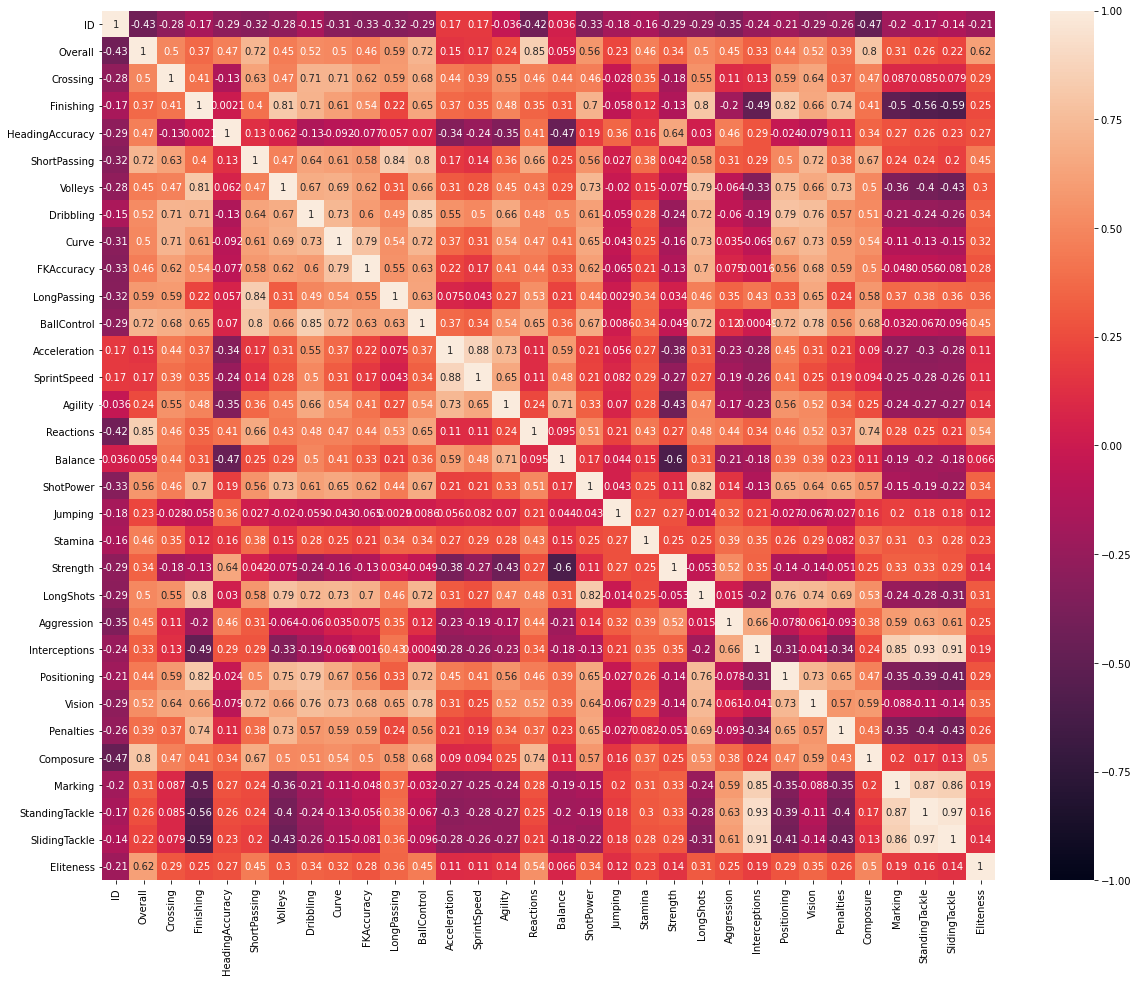

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(20, 16))
sns.heatmap(soccer_data.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [19]:
soccer_data_with_removed_features = remove_correlated_features(soccer_data, 0.9)
soccer_data_with_removed_features

Deleted StandingTackle from dataset.
Deleted SlidingTackle from dataset.


,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Eliteness
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,59,94,48,22,94,94,75,96,33,1
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,79,93,63,29,95,82,85,95,28,1
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,49,82,56,36,89,87,81,94,27,1
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,75,91,76,61,87,94,79,88,68,1
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,66,80,54,41,87,89,86,91,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,238813,J. Lundstram,47,34,38,40,49,25,42,30,...,47,38,46,46,39,52,43,45,40,0
16118,243165,N. Christoffersson,47,23,52,52,43,36,39,32,...,67,42,47,16,46,33,43,42,22,0
16119,241638,B. Worman,47,25,40,46,38,38,45,38,...,32,45,32,15,48,43,55,41,32,0
16120,246268,D. Walker-Rice,47,44,50,39,42,40,51,34,...,48,34,33,22,44,47,50,46,20,0


<IPython.core.display.Javascript object>

Split the data into train and test, with 80% training and 20% testing. Be sure to leave out columns that would not make sense in the model, like the player ID column.

In [36]:
soccer_data = soccer_data_with_removed_features.copy()
soccer_data

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Eliteness
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,59,94,48,22,94,94,75,96,33,1
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,79,93,63,29,95,82,85,95,28,1
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,49,82,56,36,89,87,81,94,27,1
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,75,91,76,61,87,94,79,88,68,1
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,66,80,54,41,87,89,86,91,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,238813,J. Lundstram,47,34,38,40,49,25,42,30,...,47,38,46,46,39,52,43,45,40,0
16118,243165,N. Christoffersson,47,23,52,52,43,36,39,32,...,67,42,47,16,46,33,43,42,22,0
16119,241638,B. Worman,47,25,40,46,38,38,45,38,...,32,45,32,15,48,43,55,41,32,0
16120,246268,D. Walker-Rice,47,44,50,39,42,40,51,34,...,48,34,33,22,44,47,50,46,20,0


<IPython.core.display.Javascript object>

In [46]:
X= soccer_data.drop(columns=['ID','Name','Overall'])
y= soccer_data['Eliteness']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    # We went to the moon in...
    random_state=1969,
)

print(f"n train records: {X_train.shape[0]}")
print(f"n test records: {X_test.shape[0]}")



n train records: 12897
n test records: 3225


<IPython.core.display.Javascript object>

In [43]:
X_train.columns

Index(['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Eliteness'],
      dtype='object')

<IPython.core.display.Javascript object>

Fit the logistic regression model using the statsmodels package and print out the coefficient summary. Which variables appear to be the most important, and what effect do they have on the probability of a player being elite?

In [44]:
cols = X_train.columns
print(cols)
# Perform ANOVAs for each of our features and outcome
selector = SelectKBest(f_classif, k=2)
selector.fit(X_train, y_train)
X_train = selector.transform(X_train)

# We don't have to transform this back into a dataframe
# this is just being done for better display
selected_cols = cols[selector.get_support()]
X_train = pd.DataFrame(X_train, columns=selected_cols, index=y_train.index)
X_train.head()

Index(['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Eliteness'],
      dtype='object')


/Users/wyattgarner/data_science-env/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,Reactions,Eliteness
2297,71,0
15122,54,0
1141,70,1
5770,68,0
3853,68,0


<IPython.core.display.Javascript object>

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
print(f"train score: {train_score}")

test_score = model.score(X_test, y_test)
print(f"test score: {test_score}")

train score: 0.9907730479956579
test score: 0.9885271317829457


/Users/wyattgarner/data_science-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<IPython.core.display.Javascript object>

We have yet to discuss how to evaluate the model, which will happen next week, but one intuitive way to see if our model predictions are reasonable is to plot a calibration curve. In essence, the probabilities predicted by a good model will match the observed proportions of outcomes (i.e. If we take all of the predictions around 70% made by our model, the corresponding observed outcomes should be Elite about 70% of the time).

First, make predictions on the test set and join them to the corresponding true outcomes. Then, use the *calibration_curve* function in scikit learn to plot a calibration curve. What do you see?

There is some helpful code for creating calibration plots at the link below:
https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py

In [48]:
probs = model.predict_proba(X_test)
probs_df = pd.DataFrame(probs, columns=["0", "1"])
probs_df["sum"] = probs_df["0"] + probs_df["1"]
probs_df





,0,1,sum
0,0.996764,0.003236,1.0
1,0.978492,0.021508,1.0
2,0.999584,0.000416,1.0
3,0.964803,0.035197,1.0
4,0.999662,0.000338,1.0
...,...,...,...
3220,0.001302,0.998698,1.0
3221,0.999272,0.000728,1.0
3222,0.999998,0.000002,1.0
3223,0.992069,0.007931,1.0


<IPython.core.display.Javascript object>

In [49]:
y_pred = model.predict(X_test)

confusion_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

# We could put this in dataframe with row/column
# labels to make it easier to read
confusion_df = pd.DataFrame(confusion_mat, columns=["0", "1"], index=["0", "1"],)
confusion_df

,0,1
0,2835,8
1,29,353


<IPython.core.display.Javascript object>

In [51]:
diagnostic_df = pd.DataFrame(X_test, columns=X_train.columns)
diagnostic_df["Eliteness"] = y_test.values
diagnostic_df["E_pred"] = y_pred
diagnostic_df["error"] = diagnostic_df["Eliteness"] != diagnostic_df["E_pred"]
diagnostic_df.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Eliteness,E_pred,error
6088,51,56,58,73,44,64,52,61,66,68,...,78,69,59,67,46,65,64,0,0,False
15852,39,32,53,56,36,55,35,35,55,55,...,60,42,51,43,47,41,40,0,0,False
9061,55,65,59,61,65,62,58,51,56,64,...,65,44,66,60,66,62,31,0,0,False
9958,54,65,61,66,60,62,43,40,58,66,...,67,56,62,61,56,51,58,0,0,False
5206,58,70,67,68,70,65,64,53,47,62,...,64,26,69,63,81,62,17,0,0,False


<IPython.core.display.Javascript object>

In [57]:
coefs = list(model.coef_)
coefs_df = pd.DataFrame(coefs, columns=X_train.columns)

<IPython.core.display.Javascript object>

In [58]:
coefs_df

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Eliteness
0,-0.041097,-0.020649,0.095351,-0.183,0.050708,0.17344,0.071632,-0.101772,0.193613,-0.150772,...,-0.168048,-0.018342,0.007204,-0.017955,0.086556,0.116755,-0.098646,-0.096508,0.024413,10.980598


<IPython.core.display.Javascript object>

We see that the lower predicted probabilities tend to be well calibrated - when the model predicts 20% likelihood of eliteness, for example, we tend to see about 20% in reality, which is a good sign. However, the calibration does falter quite a bit for the more confident predictions; weaker calibration at the extremes is fairly common for probabilistic models, although not always to this extent.